In [113]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [114]:
x_seeds = np.array([(0, 0), (1, 0), (0, 1), (1, 1)], dtype=float)
y_seeds = np.array([0, 1, 1, 0])

In [115]:
N = 1000
idxs = np.random.randint(0, 4, N)

X = x_seeds[idxs]
Y = y_seeds[idxs]

In [116]:
X += np.random.normal(scale=0.25, size=X.shape)

In [117]:
class shallow_neural_network():
    def __init__(self, num_input_features, num_hiddens):
        self.num_input_features = num_input_features
        self.num_hiddens = num_hiddens

        self.W1 = np.random.normal(size=(num_hiddens, num_input_features))
        self.b1 = np.random.normal(size=num_hiddens)
        self.W2 = np.random.normal(size=num_hiddens)
        self.b2 = np.random.normal(size=1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, x):
        z1 = np.matmul(self.W1, x) + self.b1
        a1 = np.tanh(z1)
        z2 = np.matmul(self.W2, a1) + self.b2
        a2 = self.sigmoid(z2)
        return a2, (z1, a1, z2, a2)

In [118]:
model = shallow_neural_network(2, 3)

In [119]:
def train(X, Y, model, lr=0.1):
    dW1 = np.zeros_like(model.W1)
    db1 = np.zeros_like(model.b1)
    dW2 = np.zeros_like(model.W2)
    db2 = np.zeros_like(model.b2)
    m = len(X)
    cost = 0.0
    for x, y in zip(X, Y):
        a2, (z1, a1, z2, _) = model.predict(x)
        # 손실 함수
        if y == 1:
            cost -= np.log(a2)
        else:
            cost -= np.log(1 - a2)

        diff = a2 - y
        db2 += diff

        dW2 += a1 * diff

        db1 += np.inner((1 - a1 * a1), model.W2 * diff)

        dW1 += np.outer(np.inner((1 - a1 * a1), model.W2) * diff, x)

    cost /= m
    model.W1 -= lr * dW1 / m
    model.b1 -= lr * db1 / m
    model.W2 -= lr * dW2 / m
    model.b2 -= lr * db2 / m

    return cost

In [120]:
for epoch in range(100):
    cost = train(X, Y, model, 1.0)
    if epoch % 10 == 0:
        print(epoch, cost)


0 [0.83363154]
10 [0.65976883]
20 [0.59012846]
30 [0.4731163]
40 [0.38671165]
50 [0.33863605]
60 [0.31227663]
70 [0.29687384]
80 [0.28725148]
90 [0.28089083]


In [121]:
model.predict((1, 1))[0].item()

0.037692508215554935

In [122]:
model.predict((1, 0))[0].item()

0.9085684583564557

In [123]:
model.predict((0, 1))[0].item()

0.8757633080623745

In [124]:
model.predict((0, 0))[0].item()

0.05875541391216496

In [125]:
idxs_1 = np.where(Y == 1)
idxs_0 = np.where(Y == 0)

In [126]:
X_0 = X[idxs_0]
Y_0 = Y[idxs_0]

In [127]:
X_1 = X[idxs_1]
Y_1 = Y[idxs_1]

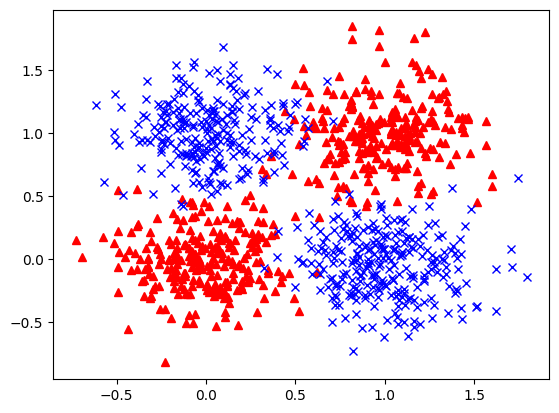

In [128]:
plt.plot(X_0[:,0], X_0[:,1], "r^")
plt.plot(X_1[:,0], X_1[:,1], "bx")
plt.show()